# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Type your code here

!curl -L -o beverage-sales.zip\
  https://www.kaggle.com/api/v1/datasets/download/sebastianwillmann/beverage-sales
!unzip /content/beverage-sales.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  118M  100  118M    0     0  48.1M      0  0:00:02  0:00:02 --:--:-- 66.4M
Archive:  /content/beverage-sales.zip
  inflating: synthetic_beverage_sales_data.csv  


In [3]:
df = pd.read_csv('/content/synthetic_beverage_sales_data.csv')
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [5]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [6]:
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Customer_Type,0
Product,0
Category,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0
Region,0


In [7]:
df.describe(include=np.number)

,Unit_Price,Quantity,Discount,Total_Price
count,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06
mean,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02
std,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02
min,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01
25%,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00
50%,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01
75%,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01
max,1.695300e+02,1.000000e+02,1.500000e-01,1.429530e+04


In [8]:
df.describe(exclude=np.number)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Region,Order_Date
count,8999910,8999910,8999910,8999910,8999910,8999910,8999910
unique,3000000,10000,2,47,4,16,NaN
top,ORD1,CUS4693,B2C,Hohes C Orange,Alcoholic Beverages,Hamburg,NaN
freq,5,1120,5795405,337114,2251625,604054,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-01 16:18:18.126182144
min,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-01 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,2022-07-02 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,2023-04-01 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-30 00:00:00


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [9]:
#Type your code here
df_sample = df.sample(10000)

In [10]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5505226 to 1262981
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       10000 non-null  object        
 1   Customer_ID    10000 non-null  object        
 2   Customer_Type  10000 non-null  object        
 3   Product        10000 non-null  object        
 4   Category       10000 non-null  object        
 5   Unit_Price     10000 non-null  float64       
 6   Quantity       10000 non-null  int64         
 7   Discount       10000 non-null  float64       
 8   Total_Price    10000 non-null  float64       
 9   Region         10000 non-null  object        
 10  Order_Date     10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 937.5+ KB


In [11]:
df_sample.describe(include=np.number)

,Unit_Price,Quantity,Discount,Total_Price
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.872115,23.140100,0.029700,130.765530
std,14.881995,26.959246,0.045012,507.473971
min,0.320000,1.000000,0.000000,0.320000
25%,1.060000,6.000000,0.000000,8.400000
50%,1.750000,11.000000,0.000000,20.860000
75%,3.120000,30.000000,0.050000,69.272500
max,128.300000,100.000000,0.150000,11316.060000


In [12]:
df_sample.describe(exclude=np.number)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Region,Order_Date
count,10000,10000,10000,10000,10000,10000,10000
unique,9979,6324,2,47,4,16,NaN
top,ORD2307996,CUS2183,B2C,Hohes C Orange,Juices,Hamburg,NaN
freq,2,8,6447,393,2530,705,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-30 21:08:29.760000256
min,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-01 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-06 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-29 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,NaN,2023-03-28 00:00:00
max,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-30 00:00:00


In [13]:
df_sample = df_sample.drop(['Order_ID', 'Customer_ID', 'Order_Date', 'Product', 'Region', 'Category'], axis=1)

In [14]:
df_sample.isnull().sum()

,0
Customer_Type,0
Unit_Price,0
Quantity,0
Discount,0
Total_Price,0


In [15]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5505226 to 1262981
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  10000 non-null  object 
 1   Unit_Price     10000 non-null  float64
 2   Quantity       10000 non-null  int64  
 3   Discount       10000 non-null  float64
 4   Total_Price    10000 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 468.8+ KB


In [16]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

encoder = ColumnTransformer([
    # ('numeric', StandardScaler(), make_column_selector(dtype_include=np.number)),
    ('categorical', OneHotEncoder(), make_column_selector(dtype_exclude=np.number))
], remainder='passthrough')

preprocessor = Pipeline([
    ('encoder', encoder),
    ('Scaler', StandardScaler())
])

In [17]:
df_preprocessed = preprocessor.fit_transform(df_sample)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

For n_clusters = 2, the average silhouette_score is : 0.717382366575321
For n_clusters = 3, the average silhouette_score is : 0.7482584632649144
For n_clusters = 4, the average silhouette_score is : 0.7023549997009153
For n_clusters = 5, the average silhouette_score is : 0.7314202930331186
For n_clusters = 6, the average silhouette_score is : 0.7360884250140698
For n_clusters = 7, the average silhouette_score is : 0.7002494711968559
For n_clusters = 8, the average silhouette_score is : 0.7048872776903132
For n_clusters = 9, the average silhouette_score is : 0.7072864289873971
For n_clusters = 10, the average silhouette_score is : 0.7100132731869013
For n_clusters = 11, the average silhouette_score is : 0.7299883723081894
For n_clusters = 12, the average silhouette_score is : 0.7265391181508699
For n_clusters = 13, the average silhouette_score is : 0.7382079067362823
For n_clusters = 14, the average silhouette_score is : 0.45385236884895697
For n_clusters = 15, the average silhouette_sc

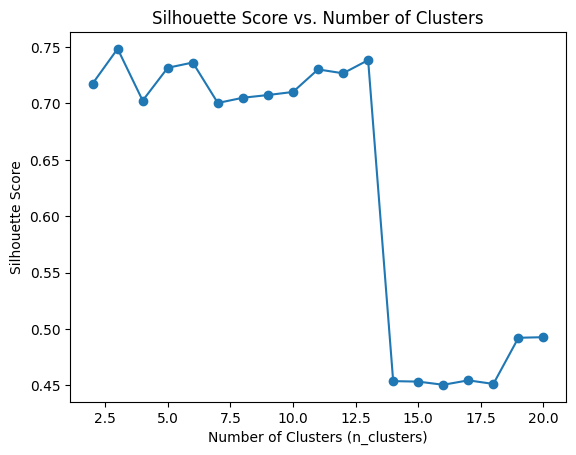

In [18]:
# Range n_clusters
range_n_clusters = range(2, 21) # Mulai dari 2 karena silhouette score tidak terdefinisi untuk 1 cluster

silhouette_scores = []

for n_clusters in range_n_clusters:
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(df_preprocessed)
  silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)
  silhouette_scores.append(silhouette_avg)
  print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot Silhouette Score vs n_clusters
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (n_clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [19]:
#Type your code here
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(df_preprocessed)
silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)
print(f"The average silhouette_score is : {silhouette_avg}")

The average silhouette_score is : 0.7482584632649144


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

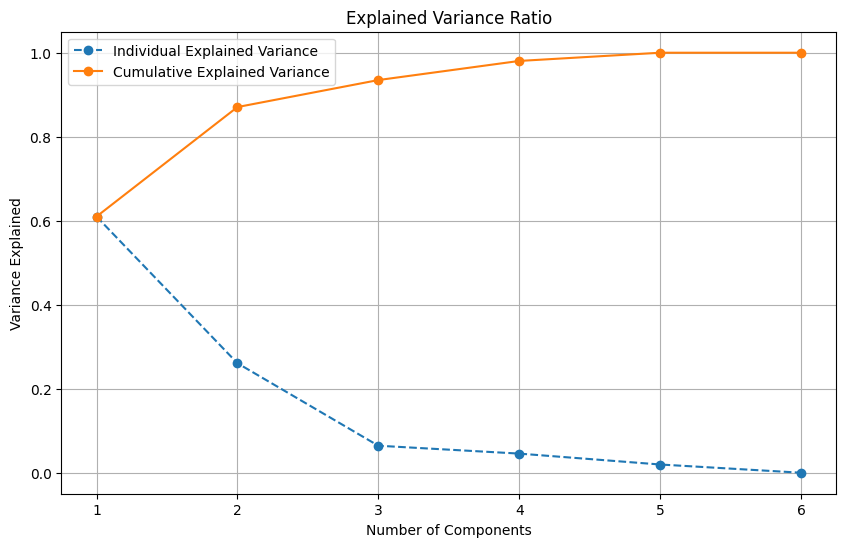

In [20]:
# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=6) # Misalnya, ingin mengurangi dimensi menjadi 10 komponen

# Fit dan transform data yang telah di-preprocess
pca_result = pca.fit_transform(df_preprocessed)

# Visualisasi Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')

plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance Ratio')
plt.legend(['Individual Explained Variance', 'Cumulative Explained Variance'])
plt.grid(True)
plt.show()


In [21]:
# Inisialisasi PCA dengan jumlah komponen yang diinginkan
pca = PCA(n_components=3) # Misalnya, ingin mengurangi dimensi menjadi 10 komponen

# Fit dan transform data yang telah di-preprocess
pca_result = pca.fit_transform(df_preprocessed)

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)
silhouette_avg = silhouette_score(pca_result, cluster_labels)
print(f"The average silhouette_score is : {silhouette_avg}")

The average silhouette_score is : 0.7914518038365883


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

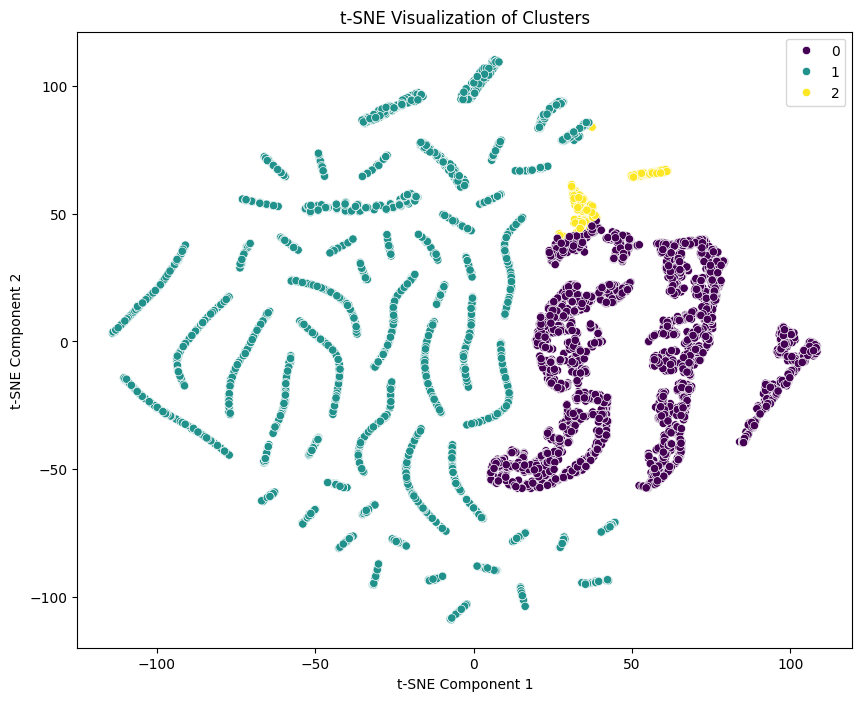

In [23]:
# Inisialisasi t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Fit dan transform data hasil PCA
tsne_result = tsne.fit_transform(pca_result)

# Buat scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=cluster_labels, palette="viridis")
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [24]:
df_sample['clusters'] = cluster_labels

In [25]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 5505226 to 1262981
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  10000 non-null  object 
 1   Unit_Price     10000 non-null  float64
 2   Quantity       10000 non-null  int64  
 3   Discount       10000 non-null  float64
 4   Total_Price    10000 non-null  float64
 5   clusters       10000 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 507.8+ KB


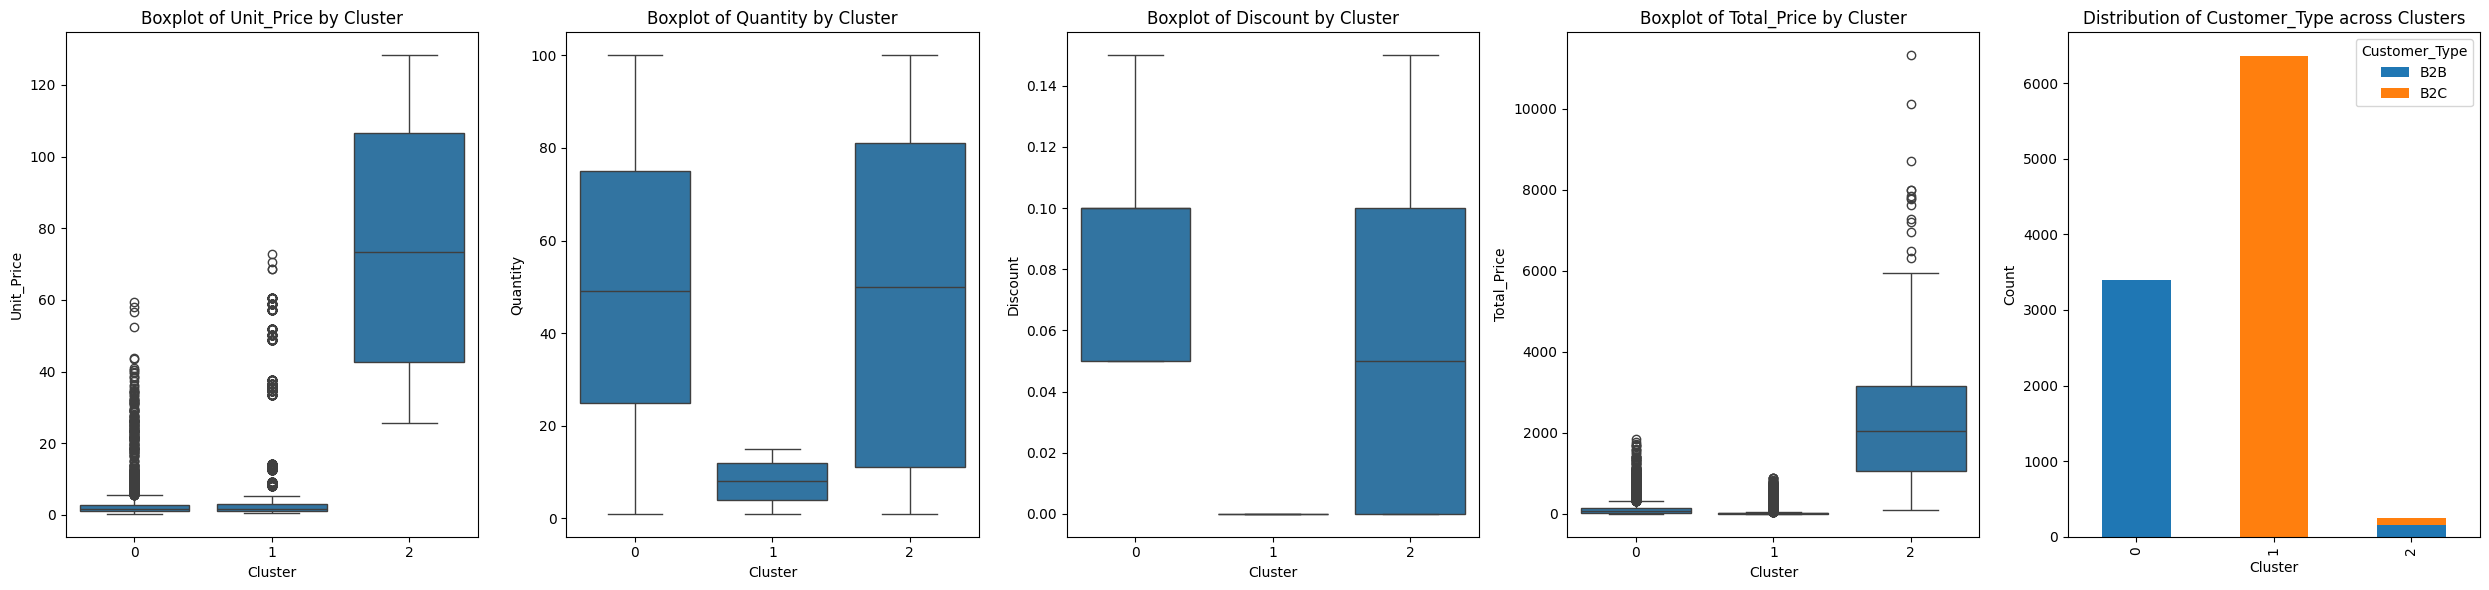

In [26]:
# Identifikasi kolom numerik dan kategorikal
numerical_cols = df_sample.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('clusters')  # Hapus 'clusters' dari daftar numerik jika ada

categorical_cols = ['Customer_Type']  # Ganti dengan kolom kategorikal lainnya jika ada

# Jumlah total plot (jumlah numerik + jumlah kategorikal)
total_plots = len(numerical_cols) + len(categorical_cols)

# Buat figure dengan subplots
fig, axes = plt.subplots(nrows=1, ncols=total_plots, figsize=(5 * total_plots, 6))

# Plot boxplot untuk fitur numerik
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='clusters', y=col, data=df_sample, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Cluster')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel(col)

# Plot stacked bar chart untuk fitur kategorikal
for j, col in enumerate(categorical_cols, start=len(numerical_cols)):
    cluster_counts = df_sample.groupby(['clusters', col]).size().unstack(fill_value=0)
    cluster_counts.plot(kind='bar', stacked=True, ax=axes[j])
    axes[j].set_title(f'Distribution of {col} across Clusters')
    axes[j].set_xlabel('Cluster')
    axes[j].set_ylabel('Count')
    axes[j].legend(title=col)

# Atur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **Analisis Karakteristik Cluster dari Model KMeans**
Berikut adalah analisis karakteristik dari setiap cluster berdasarkan **harga unit, jumlah pembelian, diskon, total harga transaksi, dan tipe pelanggan**.

## **Cluster 0: Volume Pembelian Tinggi, Harga Rendah**
- **Harga Unit (Unit_Price):** Cenderung rendah dengan sedikit outlier.
- **Jumlah Pembelian (Quantity):** Relatif rendah dibandingkan cluster lain.
- **Diskon (Discount):** Hampir tidak ada diskon yang diberikan.
- **Total Harga Transaksi (Total_Price):** Rendah, kemungkinan karena harga per unit rendah dan volume pembelian yang kecil.
- **Tipe Pelanggan:** Didominasi oleh pelanggan **B2C (Business to Consumer)**.

### **Analisis:**
Cluster ini kemungkinan terdiri dari pelanggan **ritel atau individu (B2C)** yang membeli dalam jumlah kecil dan memilih produk dengan harga rendah. Karena diskon hampir tidak ada, ini menunjukkan bahwa mereka tidak melakukan pembelian dalam jumlah besar atau dalam bentuk kontrak bisnis.

---

## **Cluster 1: Volume Pembelian Sedang dengan Harga Bervariasi**
- **Harga Unit (Unit_Price):** Masih rendah dengan beberapa outlier ke harga lebih tinggi.
- **Jumlah Pembelian (Quantity):** Paling tinggi dibanding cluster lain.
- **Diskon (Discount):** Terdapat beberapa diskon, menunjukkan pembelian dalam jumlah lebih besar.
- **Total Harga Transaksi (Total_Price):** Masih relatif rendah meskipun volume pembelian tinggi.
- **Tipe Pelanggan:** Didominasi oleh pelanggan **B2B (Business to Business)**.

### **Analisis:**
Cluster ini mencerminkan **pelanggan bisnis (B2B) atau distributor kecil** yang membeli dalam jumlah sedang hingga besar tetapi masih dalam kisaran harga rendah hingga menengah. Mereka mendapatkan beberapa diskon, yang menunjukkan bahwa mereka mungkin memiliki kontrak pembelian dengan diskon bulk.

---

## **Cluster 2: Premium Buyers dengan Harga Tinggi**
- **Harga Unit (Unit_Price):** Sangat tinggi dibanding cluster lain.
- **Jumlah Pembelian (Quantity):** Tidak setinggi cluster 1 tetapi tetap tinggi.
- **Diskon (Discount):** Lebih banyak diskon dibandingkan cluster 0.
- **Total Harga Transaksi (Total_Price):** Sangat tinggi dibanding cluster lain.
- **Tipe Pelanggan:** Mayoritas adalah pelanggan **B2B**, dengan sebagian kecil B2C.

### **Analisis:**
Cluster ini terdiri dari pelanggan **kelas premium, kemungkinan restoran, kafe, atau bisnis besar** yang membeli minuman dengan harga tinggi dalam jumlah besar. Mereka menerima lebih banyak diskon, yang menunjukkan bahwa mereka membeli dalam jumlah besar atau memiliki hubungan bisnis jangka panjang dengan pemasok.

---

# **Kesimpulan dan Strategi Bisnis**
1. **Cluster 0 (B2C, Harga Rendah, Volume Kecil)**
   - Targetkan dengan **promo produk satuan, loyalty program** untuk meningkatkan pembelian.
   - **Strategi pemasaran:** Gunakan strategi pemasaran berbasis diskon langsung atau bundling produk murah.

2. **Cluster 1 (B2B, Harga Rendah-Sedang, Volume Tinggi)**
   - Fokus pada pelanggan yang membeli dalam **jumlah besar dengan harga sedang**.
   - **Strategi pemasaran:** Tawarkan **diskon bulk, kontrak jangka panjang**, atau paket eksklusif.

3. **Cluster 2 (B2B Premium, Harga Tinggi, Volume Besar)**
   - Fokus pada pelanggan **premium seperti restoran atau distributor besar**.
   - **Strategi pemasaran:** Tawarkan **paket eksklusif, harga khusus, dan layanan pelanggan premium**.

---

Interpretasi ini bisa diperkuat dengan analisis lebih lanjut seperti **perubahan tren pembelian dari waktu ke waktu** atau **segmentasi berbasis lokasi**. Semoga membantu! 🚀


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [27]:
df_sample.to_csv('Hasil clustering.csv', index=False)